In [233]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import metrics
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [234]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt

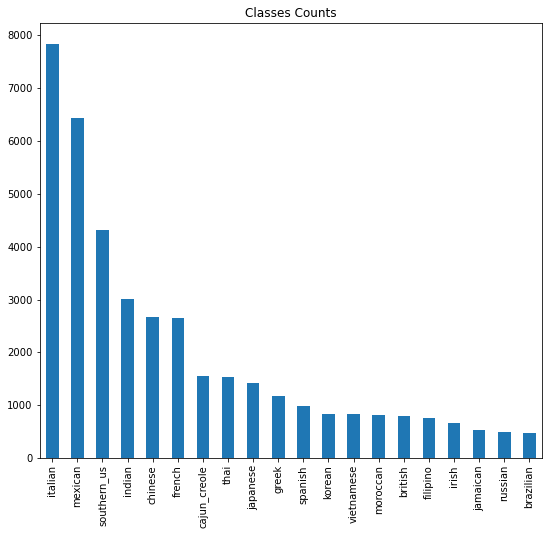

In [236]:
plt.figure(figsize=(9, 8))
train.cuisine.value_counts().plot.bar(title='Classes Counts')
plt.show()

In [237]:
train['ingredients'].str.len().max()

65

In [238]:
train['ingredients'].str.len().min()

1

In [239]:
train.ingredients=train.ingredients.apply(lambda x: ''.join([str(e).replace(' ', '') for e in x]))

In [240]:
train.ingredients 

0        romainelettuceblackolivesgrapetomatoesgarlicpe...
1        plainflourgroundpeppersalttomatoesgroundblackp...
2        eggspeppersaltmayonaisecookingoilgreenchiliesg...
3                               watervegetableoilwheatsalt
4        blackpeppershallotscornflourcayennepepperonion...
                               ...                        
39769    lightbrownsugargranulatedsugarbutterwarmwaterl...
39770    KRAFTZestyItalianDressingpurpleonionbroccolifl...
39771    eggscitrusfruitraisinssourdoughstarterflourhot...
39772    bonelesschickenskinlessthighmincedgarlicsteame...
39773    greenchilejalapenochiliesonionsgroundblackpepp...
Name: ingredients, Length: 39774, dtype: object

In [241]:
cv = TfidfVectorizer(max_df=0.99, min_df=0.001, ngram_range=(1,1))
df = cv.fit_transform(train.ingredients)
df.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [242]:
X = df
y = train.cuisine.values
y

array(['greek', 'southern_us', 'filipino', ..., 'irish', 'chinese',
       'mexican'], dtype=object)

In [243]:
logicRegression = LogisticRegression(multi_class='ovr')

In [244]:
logicRegression.fit(X, y)

LogisticRegression(multi_class='ovr')

In [245]:
y_pred = logicRegression.predict(X)
y_pred

array(['italian', 'italian', 'italian', ..., 'italian', 'italian',
       'italian'], dtype=object)

In [246]:
logicRegression.predict_proba(X)[:, 1]

array([0.01957962, 0.01957962, 0.01957962, ..., 0.01957962, 0.01957962,
       0.01957962])

In [247]:
metrics.accuracy_score(y, y_pred)

0.2009101423040177

In [248]:
metrics.f1_score(y, y_pred, average='micro')

0.2009101423040177

In [249]:
metrics.f1_score(y, y_pred, average='macro')

0.024600649791840328

In [250]:
metrics.f1_score(y, y_pred, average='weighted')

0.0793207816747758